   # Insights of Data Scientists 


This project will explore couple of facts on data scientists by using stack overflow survey data from 2016 to 2018.

###### Q1. Data Scientists  growth over the period 
###### Q2. Gender based data Scientists  population
###### Q3. Data Scientists  population around the world
###### Q4. Data Scientists  popular languages
###### Q5. Data Scientists  job satisfaction
###### Q6. Age wise data Scientists average salary 



In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [35]:
# Load stack overflow survey data from 2016 to 2018
survey_data = {}
survey_data['2016'] =pd.read_csv('data/survey_results_public_2016.csv', encoding = 'ISO-8859-1',low_memory=False)
survey_data['2017'] =pd.read_csv('data/survey_results_public_2017.csv', encoding = 'ISO-8859-1',low_memory=False)
survey_data['2018'] =pd.read_csv('data/survey_results_public_2018.csv', encoding = 'ISO-8859-1',low_memory=False)

In [41]:
# number of questions asked in each year
for i in survey_data:
    print(' ')
    print('In '+  i + ' below questions are asked:' )
    for j in list(survey_data[i].columns):
        print('          ' + j)
       
        
    
    


 
In 2016 below questions are asked:
          unnamed: 0
          collector
          country
          un_subregion
          so_region
          age_range
          age_midpoint
          gender
          self_identification
          occupation
          occupation_group
          experience_range
          experience_midpoint
          salary_range
          salary_midpoint
          big_mac_index
          tech_do
          tech_want
          aliens
          programming_ability
          employment_status
          industry
          company_size_range
          team_size_range
          women_on_team
          remote
          jobsatisfaction
          job_discovery
          dev_environment
          commit_frequency
          hobby
          dogs_vs_cats
          desktop_os
          unit_testing
          rep_range
          visit_frequency
          why_learn_new_tech
          education
          open_to_new_job
          new_job_value
          job_search_annoyance
   

In [42]:
# Convert column names to lower case
survey_data['2018'] = survey_data['2018'].rename(str.lower, axis='columns')
survey_data['2017'] = survey_data['2017'].rename(str.lower, axis='columns')
survey_data['2016'] = survey_data['2016'].rename(str.lower, axis='columns')



In [43]:
# Correct column names to have unique name across the years
survey_data['2018'] = survey_data['2018'].rename(index=str, columns={"devtype": "occupation","job_satisfaction":"jobsatisfaction"})
survey_data['2017'] = survey_data['2017'].rename(index=str, columns={"developertype": "occupation","job_satisfaction":"jobsatisfaction"})
survey_data['2016'] = survey_data['2016'].rename(index=str, columns={"devtype": "occupation","job_satisfaction":"jobsatisfaction"})


In [44]:
# Extract Data scientist data out of survey data
data_scientists ={}
data_scientists['2016']= survey_data['2016'][survey_data['2016']['occupation'].str.contains('Data scientist|achine learning', na=False)]
data_scientists['2017']= survey_data['2017'][survey_data['2017']['occupation'].str.contains('Data scientist|achine learning', na=False)]
data_scientists['2018']= survey_data['2018'][survey_data['2018']['occupation'].str.contains('Data scientist|achine learning', na=False)]


In [45]:
# Check number of survey questions and responses from across technologies as well as data science
for i in survey_data:
    print('In '+  i + ': ' +str(survey_data[i].shape[1]) + ' survey questions were asked and ' + str(survey_data[i].shape[0]) +' candidate took the survery and out of this '+ str(data_scientists[i].shape[0]) + ' are  data scientists')



In 2016: 66 survey questions were asked and 56030 candidate took the survery and out of this 1185 are  data scientists
In 2017: 154 survey questions were asked and 51392 candidate took the survery and out of this 3595 are  data scientists
In 2018: 129 survey questions were asked and 98855 candidate took the survery and out of this 7088 are  data scientists


###### Q1. Data Scientists  growth over the period

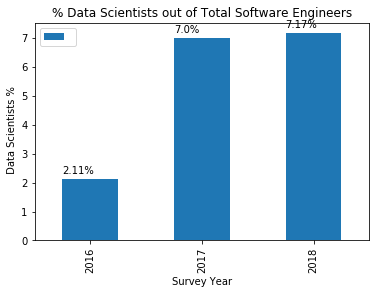

In [47]:
# Graph generation
ds_list={}
ds_list = pd.DataFrame(columns=[''])
for i in ('2016','2017','2018'):
    ds_surveys= data_scientists[i].shape[0]
    total_surveys=survey_data[i].shape[0]
    ds_percent=(ds_surveys/total_surveys)*100
    ds_list.loc[i] = [ds_percent]
ax =ds_list.plot.bar()    
for p in ax.patches:
    ax.annotate(str(round(p.get_height(), 2))+ '%', (p.get_x(), p.get_height() + 0.2))
plt.xlabel('Survey Year')
plt.ylabel(' Data Scientists %')


plt.title("% Data Scientists out of Total Software Engineers")
plt.show()




###### Q2. Gender based data Scientists  population

In [48]:
# Extract data population based on gender. Note: only Male and Female categories are considered for this activity
gender_list={}
gender_list = pd.DataFrame(columns=['Male', 'Female'])
for i in ('2016','2017','2018'):
    gender_list.loc[i] = [data_scientists[i]['gender'][data_scientists[i]['gender'].isin(['Male'])==True].count(),data_scientists[i]['gender'][data_scientists[i]['gender'].isin(['Female'])==True].count()]



<Figure size 432x288 with 0 Axes>

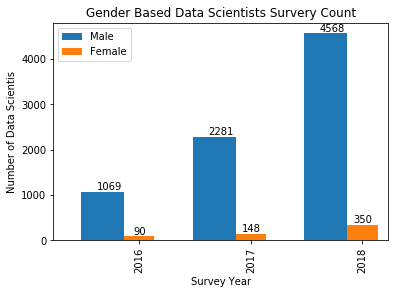

In [49]:
# Graph generation
ind = np.arange(3)
width = 0.27  
fig = plt.figure()
ax =gender_list.plot.bar( title='Gender Based Data Scientists Survery Count')
yvals = list(gender_list['Male'])
rects1 = ax.bar(ind, yvals, width)
zvals = list(gender_list['Female'])
rects2 = ax.bar(ind+width, zvals, width)
ax.set_ylabel('Number of Data Scientis')
ax.set_xlabel('Survey Year')
ax.set_xticks(ind+width)
ax.set_xticklabels( ('2016', '2017', '2018') )
ax.legend( (rects1[0], rects2[0]), ('Male', 'Female') )

def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.0*h, '%d'%int(h),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
plt.show()

###### Q3. Data Scientists  population around the world

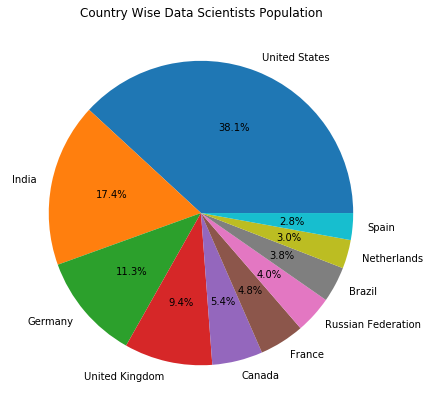

In [54]:
# Script to get country wise data scientists counts
country_survey=data_scientists['2018'].groupby('country').count()['respondent'].rename('' ).astype(int).sort_values(ascending=False).head(10)
country_survey.plot(kind = 'pie', figsize = (10,7),autopct='%1.1f%%', title =  'Country Wise Data Scientists Population')
plt.xticks="" 
plt.show()

###### Q4. Data Scientists  Popular Languages

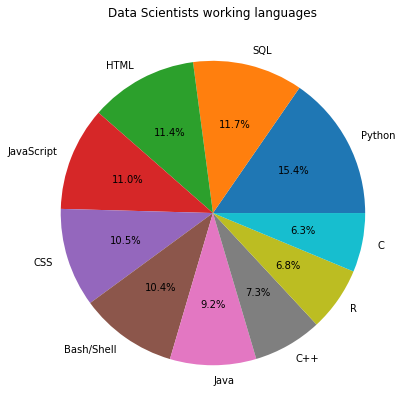

In [56]:
# Scripts to get language names from the semicolon separated list data 

languages=data_scientists['2018']['languageworkedwith'].str.replace(" ", "").str.split(';', expand=True).stack().reset_index(drop=True, level=1).value_counts().rename('').sort_values(ascending=False).head(10)

languages.plot(kind = 'pie', figsize = (10,7),autopct='%1.1f%%', title =  'Data Scientists working languages')
plt.xticks="" 
plt.show()



###### Q5. Data Scientists  job satisfaction

In [58]:
# Each year have different set of options provided for the job satisfaction category. 
# For our analysis all the possible values are mapped to Happy, Unhappy and Neutral
map_jobsatisfaction ={}
map_jobsatisfaction['2018'] = {"Moderately satisfied": "Happy", 
                               "Extremely satisfied": "Happy",
                               "Slightly satisfied": "Happy",
                               "Neither satisfied nor dissatisfied": "Neutral", 
                               "Slightly dissatisfied": "Unhappy",
                               "Moderately dissatisfied": "Unhappy",
                               "Extremely dissatisfied": "Unhappy",
                               np.nan:"Neutral" 
                              }

map_jobsatisfaction['2016'] = { "I love my job" : "Happy",
                               "I don't have a job" : "Neutral",
                               "I'm somewhat satisfied with my job" : "Happy",
                               "I'm somewhat dissatisfied with my job" : "Unhappy",
                               "I'm neither satisfied nor dissatisfied" : "Neutral",
                               "Other (please specify)" : "Neutral",
                               "I hate my job" : "Unhappy", 
                               np.nan:"Neutral"  
                             }

map_jobsatisfaction['2017'] = { 0 : "Unhappy",
                                1 : "Unhappy",
                                2 : "Unhappy",
                                3 : "Unhappy",
                                4 : "Unhappy",
                                5 : "Neutral",
                                6 : "Happy",
                                7 : "Happy",
                                8 : "Happy",
                                9 : "Happy",
                                10 : "Happy",
                                np.nan:"Neutral" 
                            }

In [59]:
# Align data set value with the mapping set
jobsatisfication = {}
jobsatisfication['2018'] = data_scientists['2018'].jobsatisfaction
jobsatisfication['2017'] = data_scientists['2017'].jobsatisfaction
jobsatisfication['2016'] = data_scientists['2016'].jobsatisfaction

jobsatisfication['2016'] = jobsatisfication['2016'].map(map_jobsatisfaction['2016'])
jobsatisfication['2017'] = jobsatisfication['2017'].map(map_jobsatisfaction['2017'])
jobsatisfication['2018'] = jobsatisfication['2018'].map(map_jobsatisfaction['2018'])

<Figure size 432x288 with 0 Axes>

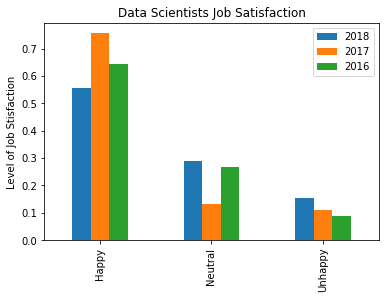

In [66]:
# Plot the graph
jobsatisfication_counts = pd.DataFrame.from_dict({i: jobsatisfication[i].value_counts()/len(jobsatisfication[i])
                                               for i in jobsatisfication})
ind = np.arange(3)
width = 0.27  
fig = plt.figure()
ax =jobsatisfication_counts.plot.bar( title='Data Scientists Job Satisfaction')

plt.ylabel("Level of Job Stisfaction")
plt.show()


###### Q6. Age wise data Scientists average salary 


In [61]:
# will explore the above questions by using 2018 data set.

data_scientists_2018 =data_scientists['2018']

# Candidates gets salary in differnt period. 
#correct the data to calculate annual salary for that we need to fix the salarytype first
data_scientists_2018.loc[data_scientists_2018.salarytype == 'Weekly', 'saltype']= 52
data_scientists_2018.loc[data_scientists_2018.salarytype == 'Yearly', 'saltype'] = 1
data_scientists_2018.loc[data_scientists_2018.salarytype == 'Monthly', 'saltype'] = 12
data_scientists_2018 =data_scientists_2018[data_scientists_2018.salarytype.isin ([ 'Monthly','Weekly','Yearly'])]

In [63]:
# Clean/drop the data to remove null and 0 value salaries
data_scientists_2018=data_scientists_2018[data_scientists_2018['convertedsalary']>0 & data_scientists_2018['convertedsalary'].notnull()]
data_scientists_2018['annualsalary'] = data_scientists_2018.convertedsalary * data_scientists_2018.saltype 

#Delete Salarey less than 12000. Assuming minimum wage >1000/Month
data_scientists_2018=data_scientists_2018[data_scientists_2018.annualsalary>12000]

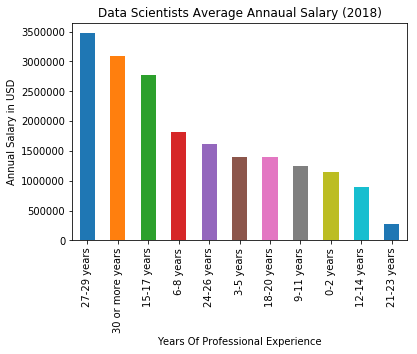

In [64]:
salary_data=data_scientists_2018.groupby('yearscodingprof').mean()['annualsalary'].rename('Annual Salary' ).astype(int).sort_values(ascending=False)
#salary_data=salary_2018.dropna(subset=['yearscodingprof']).groupby('yearscodingprof').mean()['annualsalary'].rename('annualsalary' ).astype(int).sort_values(ascending=False).head(10)
salary_data.plot(kind = 'bar',  title =  'Data Scientists Average Annaual Salary (2018)')
plt.xlabel("Years Of Professional Experience")
plt.ylabel("Annual Salary in USD")
plt.show()